In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [ ]:
deals = pd.read_excel('new_Deals.xlsx')

In [ ]:
spend = pd.read_excel('new_Spend.xlsx')

**Comparing the effectiveness of different campaigns in terms of lead generation and conversion rate.**

Counting leads by Campaign using grouping by Campaign field in the table
Campaigns.

Let's calculate how many total customers were attracted by each campaign

In [ ]:
deals_campaign_analyse = deals.groupby('Campaign').apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Stage Done': (x['Stage'] == 'Payment Done').sum(),
    'Lost Deals': (x['Stage'] == 'Lost').sum()
}))

In [ ]:
deals_campaign_analyse

,Total Deals,Stage Done,Lost Deals
Campaign,,,
1performancemax_wide_PL,261,4,251
2day_DE,9,0,9
ASA_de_DE,112,5,72
Akademia,7,1,2
Aussiedler_DE,6,1,4
...,...,...,...
work_wr,6,0,6
workingin_DE,48,0,43
yo_DE,13,0,11


In [ ]:
campaign_analyse = pd.merge(deals_campaign_analyse,
                         spend.groupby('Campaign')['Clicks'].sum().reset_index(),
                         on='Campaign',
                         how='left')


In [ ]:
campaign_analyse.head(5)

,Campaign,Total Deals,Stage Done,Lost Deals,Clicks
0,1performancemax_wide_PL,261,4,251,11747.0
1,2day_DE,9,0,9,NaN
2,ASA_de_DE,112,5,72,NaN
3,Akademia,7,1,2,NaN
4,Aussiedler_DE,6,1,4,NaN


Since there are 130 advertising campaigns, we will sort by the total number of leads and take the 10 best ones for analysis, all the rest will be grouped in Other

What is interesting is that the top 10 include those advertising campaigns that attracted more than 500 clients.

In [ ]:
sorted_campaign_analyse = campaign_analyse.loc[campaign_analyse['Campaign'] != 'Unknown'].sort_values(by='Total Deals', ascending=False)
top_10_campaigns = sorted_campaign_analyse.head(10)
top_10_campaigns

,Campaign,Total Deals,Stage Done,Lost Deals,Clicks
116,wide_DE,2662,105,2168,36494.0
87,performancemax_digitalmarkt_ru_DE,2653,112,2335,NaN
128,youtube_shorts_DE,1635,53,1322,57873.0
96,recentlymoved_DE,750,31,597,7611.0
113,webinar,633,3,32,NaN
121,women,612,31,474,7139.0
16,Dis_DE,581,30,506,NaN
21,LAL_DE,542,28,377,5813.0
70,interests_Uxui_DE,531,27,421,6301.0
120,wide_webinar_DE,505,1,23,2696.0


In [ ]:
sorted_campaign_analyse.columns

Index(['Campaign', 'Total Deals', 'Stage Done', 'Lost Deals', 'Clicks'], dtype='object')

In [ ]:
other_campaigns = sorted_campaign_analyse.iloc[10:]
other_campaigns_summary = other_campaigns[['Total Deals', 'Stage Done', 'Lost Deals', 'Clicks']].sum()
other_campaigns_summary.name = 'Other Campaigns'
other_campaigns_summary

,Other Campaigns
Total Deals,4962.0
Stage Done,166.0
Lost Deals,3736.0
Clicks,264309.0


In [ ]:
top_10_campaigns = pd.concat([top_10_campaigns, pd.DataFrame(other_campaigns_summary).T])
top_10_campaigns.at[top_10_campaigns.index[-1], 'Campaign'] = 'Other Campaigns'
top_10_campaigns

,Campaign,Total Deals,Stage Done,Lost Deals,Clicks
116,wide_DE,2662.0,105.0,2168.0,36494.0
87,performancemax_digitalmarkt_ru_DE,2653.0,112.0,2335.0,NaN
128,youtube_shorts_DE,1635.0,53.0,1322.0,57873.0
96,recentlymoved_DE,750.0,31.0,597.0,7611.0
113,webinar,633.0,3.0,32.0,NaN
121,women,612.0,31.0,474.0,7139.0
16,Dis_DE,581.0,30.0,506.0,NaN
21,LAL_DE,542.0,28.0,377.0,5813.0
70,interests_Uxui_DE,531.0,27.0,421.0,6301.0
120,wide_webinar_DE,505.0,1.0,23.0,2696.0


Conversion Rate calculation: the number of transactions (Payment Done or Lost) to the total number of transactions for each Campaign.

In [ ]:
top_10_campaigns['Conversion Done %'] = round(top_10_campaigns['Stage Done'] / top_10_campaigns['Total Deals'] * 100, 2)
top_10_campaigns['Conversion Lost %'] = round(top_10_campaigns['Lost Deals'] / top_10_campaigns['Total Deals'] * 100, 2)
top_10_campaigns

,Campaign,Total Deals,Stage Done,Lost Deals,Clicks,Conversion Done %,Conversion Lost %
116,wide_DE,2662.0,105.0,2168.0,36494.0,3.94,81.44
87,performancemax_digitalmarkt_ru_DE,2653.0,112.0,2335.0,NaN,4.22,88.01
128,youtube_shorts_DE,1635.0,53.0,1322.0,57873.0,3.24,80.86
96,recentlymoved_DE,750.0,31.0,597.0,7611.0,4.13,79.60
113,webinar,633.0,3.0,32.0,NaN,0.47,5.06
121,women,612.0,31.0,474.0,7139.0,5.07,77.45
16,Dis_DE,581.0,30.0,506.0,NaN,5.16,87.09
21,LAL_DE,542.0,28.0,377.0,5813.0,5.17,69.56
70,interests_Uxui_DE,531.0,27.0,421.0,6301.0,5.08,79.28
120,wide_webinar_DE,505.0,1.0,23.0,2696.0,0.20,4.55


In [ ]:
# Create a summary table
pivot_table = top_10_campaigns.pivot_table(index='Campaign', values=['Conversion Done %', 'Conversion Lost %'], aggfunc='mean')
pivot_table

,Conversion Done %,Conversion Lost %
Campaign,,
Dis_DE,5.16,87.09
LAL_DE,5.17,69.56
Other Campaigns,3.35,75.29
interests_Uxui_DE,5.08,79.28
performancemax_digitalmarkt_ru_DE,4.22,88.01
recentlymoved_DE,4.13,79.60
webinar,0.47,5.06
wide_DE,3.94,81.44
wide_webinar_DE,0.20,4.55


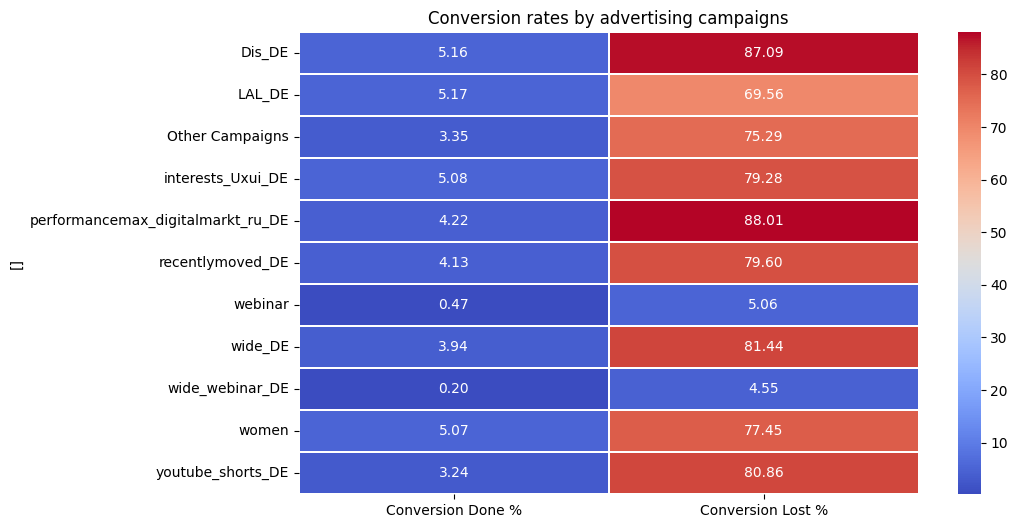

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, linewidths=0.2)
plt.title('Conversion rates by advertising campaigns')
plt.ylabel([])
plt.show()

on this heat map we can see the conversion rate of successful deals and canceled deals. Successful deals are consistently within 5%. We can see that webinars and campaigns for “women” have a very small % of lost customers.

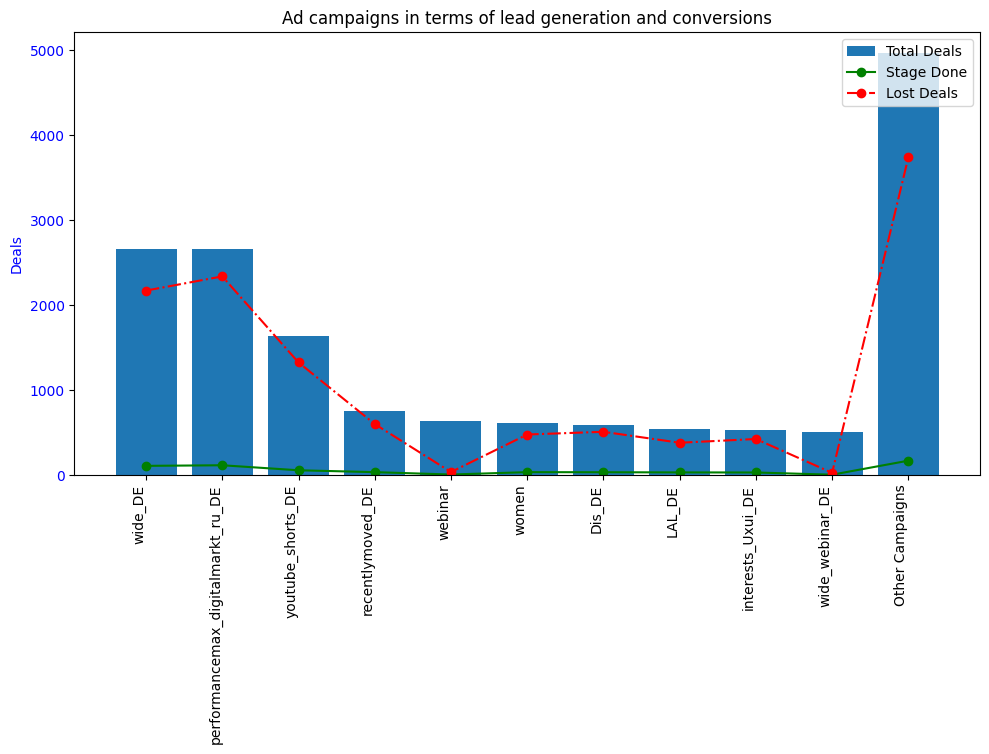

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bar = ax1.bar(top_10_campaigns['Campaign'], top_10_campaigns['Total Deals'])
ax1.set_ylabel('Deals', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

line1, = ax1.plot(top_10_campaigns['Campaign'], top_10_campaigns['Stage Done'], marker='o', linestyle='-', color='green')
line2, = ax1.plot(top_10_campaigns['Campaign'], top_10_campaigns['Lost Deals'], marker='o', linestyle='-.', color='red')

plt.title('Ad campaigns in terms of lead generation and conversions')

fig.tight_layout()

ax1.legend([bar, line1, line2], ['Total Deals', 'Stage Done', 'Lost Deals'], loc='upper right')

fig.autofmt_xdate(rotation=90)

min_y = min(min(ax1.get_ylim()[0], ax1.get_ylim()[0]), 0)
max_y = max(ax1.get_ylim()[1], ax1.get_ylim()[1])
ax1.set_ylim(min_y, max_y)

plt.show()

**Total Deals:** **"wide_DE ‘** and **’performancemax_digitalmarkt_ru_DE ”** rank first and second, respectively, with just over 2600 deals each. While the rest of the campaigns have significantly lower transaction volumes, ranging from 500 to 2600.

**Lost Deals:** The graph also shows that the campaigns **“wide_DE”, “performancemax_digitalmarkt_ru_DE”, and “youtube_shorts_DE ”** have the highest percentage of lost deals. This means that although these campaigns generate a significant number of leads, most of them do not convert into successful deals. The lost deals are visualized by the red dotted line, and for these campaigns it shows the highest peaks.

**Stage Done:** The green dots on the graph representing the number of successfully completed deals are significantly lower compared to the total number of deals. This is especially noticeable in the **“webinar”, “wide_webinar_DE”, and “youtube_shorts_DE” campaigns,** where conversion rates are very low (less than 1% for some).

Campaigns with high transaction counts, such as **“wide_DE”, “performancemax_digitalmarkt_ru_DE”, and “youtube_shorts_DE ”**, also show high loss rates. This may indicate that although these campaigns are successful in attracting attention and leads, the conversion process needs improvement. On the other hand, campaigns with fewer transactions, such as **“women”, “Dis_DE”, and “LAL_DE ”**, show a more balanced ratio of leads to successful conversions, which may indicate that they are doing a better job of driving transactions to completion.

Conclusions: high activity in some campaigns, such as “wide_DE” and “performancemax_digitalmarkt_ru_DE”, but a high percentage of lost transactions may indicate a need to rethink the approach to lead handling to reduce losses and increase conversion efficiency.

In [ ]:
df_filtered = top_10_campaigns[top_10_campaigns['Campaign'] != 'Other Campaigns']

In [ ]:
fig2 = px.scatter(df_filtered,
                  x='Total Deals',
                  y='Conversion Done %',
                  hover_name='Campaign',
                  color='Campaign',
                  title='Campaign Performance',
                  size='Stage Done')
fig2.show()

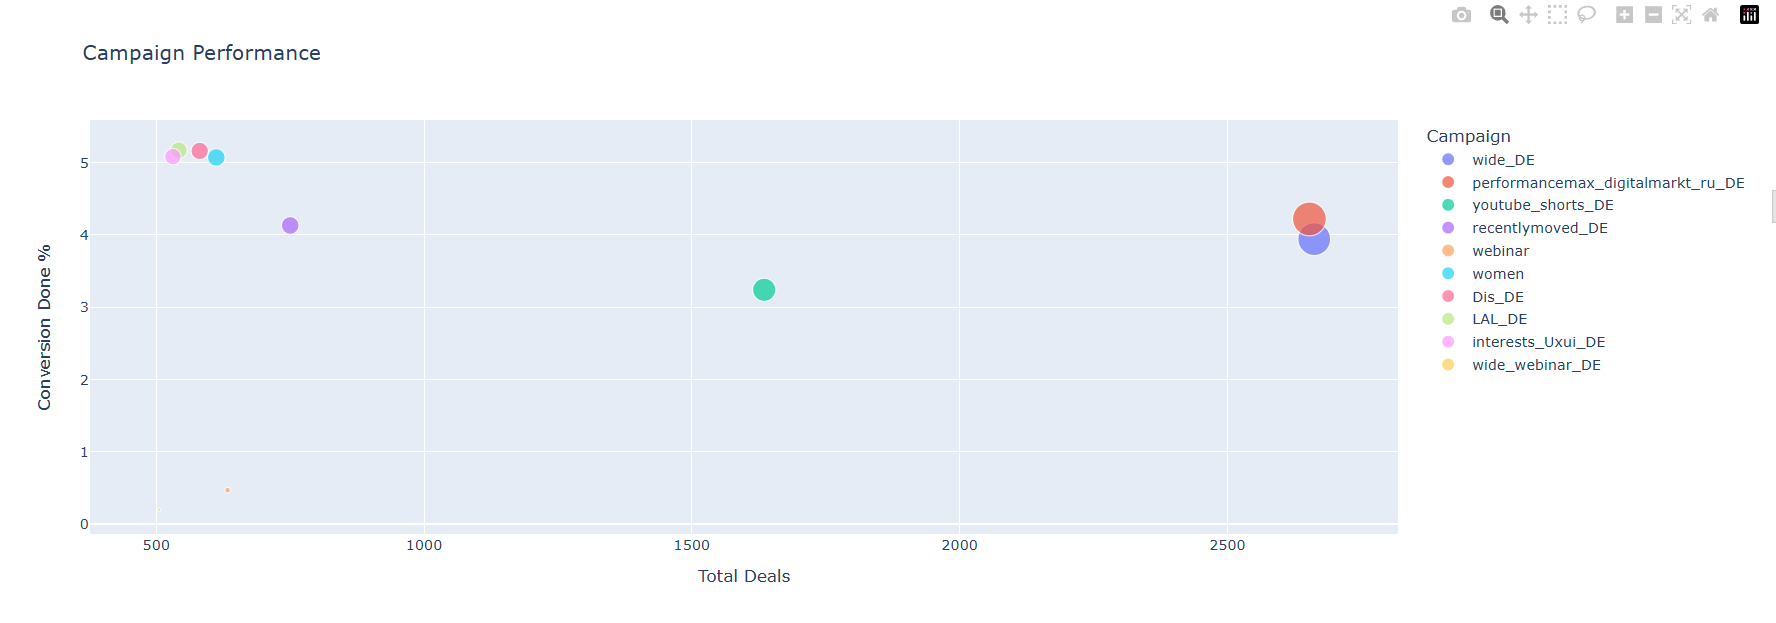

Campaigns with a high number of deals **wide_DE and performance_max_digitalmarkt_ru_DE** have a higher number of deals (around 3000-5000), with a conversion rate of around 4%.

**The group of companies in the top left corner** show a high conversion percentage (close to 5%), but their number of transactions is relatively low.

It can be concluded that campaigns with a low conversion rate but a high number of transactions may need optimization to improve performance, or the strategy for campaigns with a low number of transactions but high conversion rate needs to be revised to scale.

**Funnel of Successful Deals Clicks - Total Deals - Stage Done**

In [ ]:
top_10_campaigns['Clicks'].fillna(0, inplace=True)

In [ ]:
funnel_data = pd.melt(df_filtered,
                      id_vars='Campaign',
                      value_vars=['Clicks', 'Total Deals', 'Stage Done'],
                      var_name='Stage',
                      value_name='Count')

funnel_data

,Campaign,Stage,Count
0,wide_DE,Clicks,36494.0
1,performancemax_digitalmarkt_ru_DE,Clicks,NaN
2,youtube_shorts_DE,Clicks,57873.0
3,recentlymoved_DE,Clicks,7611.0
4,webinar,Clicks,NaN
5,women,Clicks,7139.0
6,Dis_DE,Clicks,NaN
7,LAL_DE,Clicks,5813.0
8,interests_Uxui_DE,Clicks,6301.0
9,wide_webinar_DE,Clicks,2696.0


In [ ]:
fig = px.funnel(funnel_data, x='Count', y='Stage', color='Campaign',
                title="Funnel Visualization by Campaigns",
                hover_data=['Campaign', 'Count'])

fig.show()

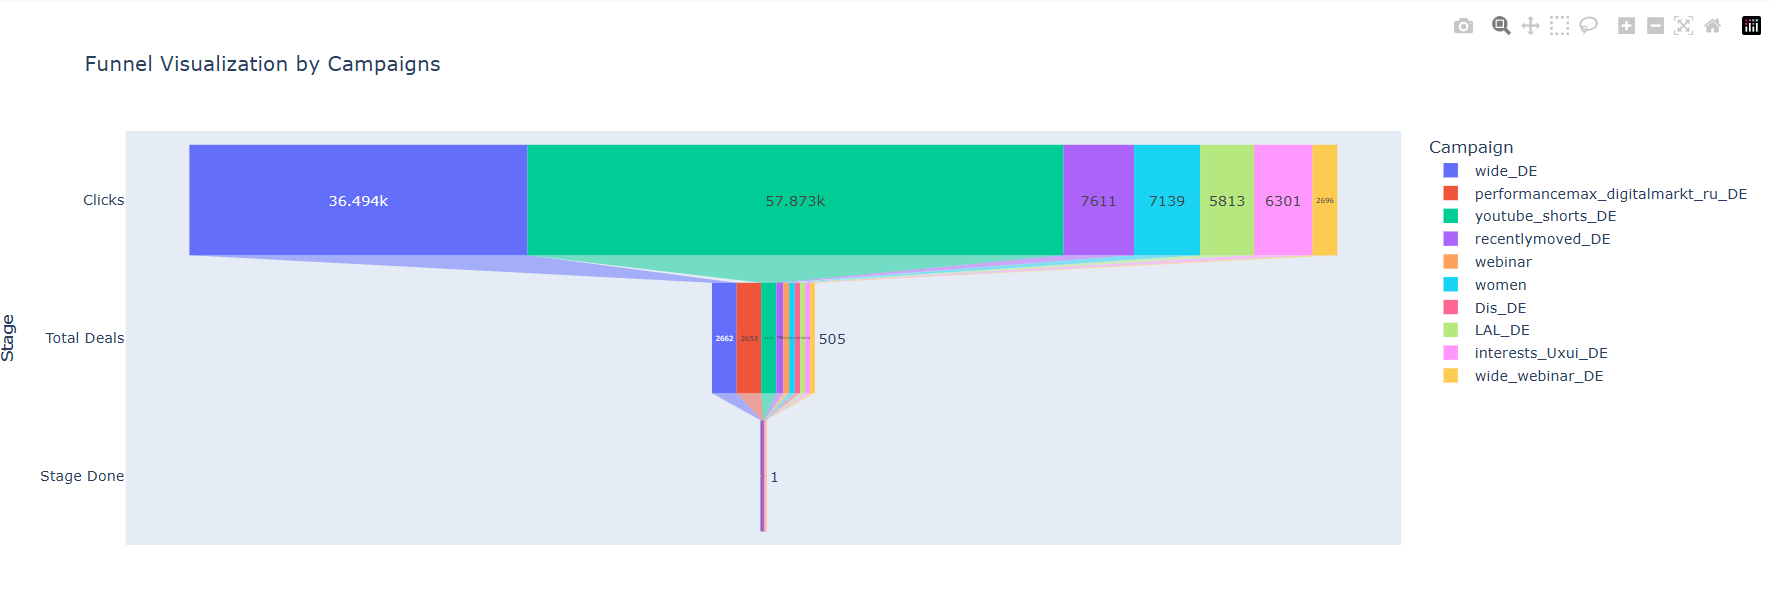

**Clicks** - the first level shows the total number of clicks for each campaign. The most notable results are shown by campaigns: youtube_shorts_DE (~57.873k clicks), wide_DE (~36.494k clicks).

**Total Deals** - this stage shows how many clicks converted to deals. The results are significantly reduced compared to the first stage. The youtube_shorts_DE and wide_DE campaigns also dominate the number of deals (approximately 2662 and 505 deals respectively).

**Stage Done** - at the last stage there is a significant decrease in the number of deals completed to the end, down to a minimum value of 1. This may indicate a sharp loss of customers at the last stage of the funnel.

**Analyze the number of transactions of advertising campaigns on different dates**

In [ ]:
# Grouping by dates and campaigns to calculate the number of deals
deals_campaign_date = deals.groupby(['Campaign', 'Campaign Date']).apply(lambda x: pd.Series({
    'Total Deals': len(x),
    'Successful Deals': (x['Stage'] == 'Payment Done').sum()
})).reset_index()

deals_campaign_date

,Campaign,Campaign Date,Total Deals,Successful Deals
0,LAL_DE,2023-07-07,542,28
1,LAL_ab__PL,2024-04-15,7,0
2,_DE,2023-06-17,19,0
3,_Lost_DE,2023-05-20,6,1
4,_prizes_DE,2023-10-11,2,0
5,_widde_PL,2024-03-20,59,0
6,b_DE,2023-07-15,139,7
7,berlin_dd_DE,2024-02-09,22,0
8,interests_DE,2023-07-05,37,0
9,interests_DE,2023-08-02,8,0


In [ ]:
deals_campaign_date['Campaign'].nunique()

25

We add the following code because there was a warning that the deprecated to_pydatetime() method was being used inside the Plotly library. This warning occurs when a pandas column of datetime type is converted to an array of dates, and the behavior of this method will be changed in the future.

To solve this problem, we need to make sure that the date in the chart is already passed in the correct format, and that Plotly itself does not try to convert it again.

In [ ]:
# Convert 'Campaign Date' to datetime format
deals_campaign_date['Campaign Date'] = pd.to_datetime(deals_campaign_date['Campaign Date'])

# Convert dates to strings to avoid Plotly conversion
deals_campaign_date['Campaign Date'] = deals_campaign_date['Campaign Date'].dt.strftime('%Y-%m-%d')

In [ ]:
fig = px.line(
    deals_campaign_date,
    x='Campaign Date',
    y='Total Deals',
    color='Campaign',
    line_group='Campaign',
    title='Effectiveness of campaigns by date',
    hover_data=['Successful Deals']
)

fig.update_traces(mode='lines+markers')

fig.show()


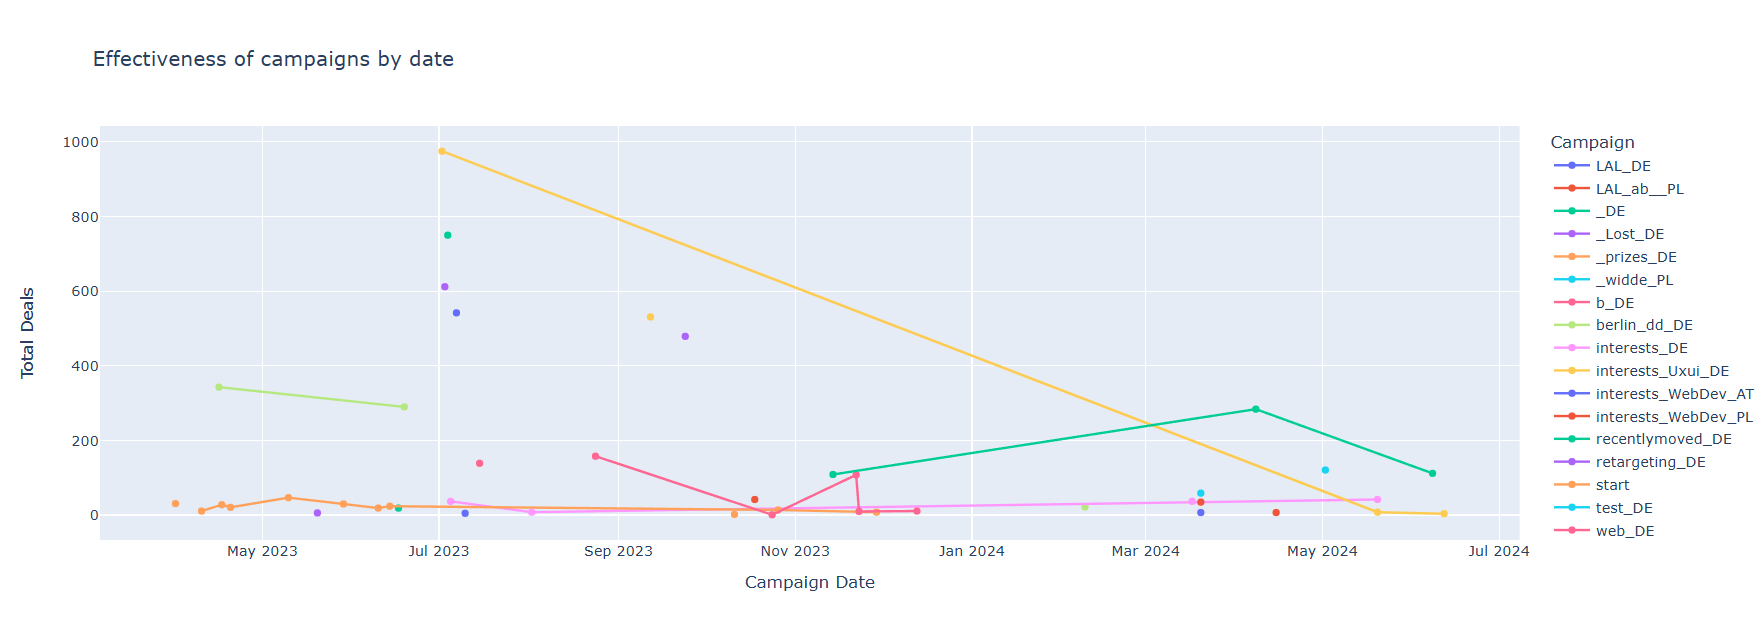

**“wide_DE” and “women”, ** had a high start, but then their results went down. Most other campaigns (e.g. “interests_DE”, “web_DE”) have more modest results (up to 200 deals), with little change in effectiveness over time.

For almost all campaigns, a decrease in effectiveness over time can be observed, which may suggest that long-term support for campaigns requires more aggressive marketing strategies.
**“interests_Uxui_DE” and “LAL_DE”,** while not performing as well, retain some stability.

Late-stage marketing efforts may need to be strengthened or targeting may need to be improved.
Campaigns that have shown stable results can be used as examples for future launches, while it is worth developing long-term customer retention strategies to avoid a sharp decline in the number of transactions.

Thus, the analysis of the graph demonstrates the importance of not only successfully launching campaigns, but also maintaining them and improving targeting to retain high levels of transactions.

**Evaluate the effectiveness of various marketing sources (Source) in generating quality leads**

Counting quality leads: Filter by Quality field and group by Source.

Comparison of Sourse by the number of generated quality leads (percentage of the total number)

In [ ]:
# Filtering deals by quality High
high_quality_deals = deals[deals['Quality'] == 'A - High']
high_quality_deals

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Campaign Date
478,5805028000055524352,Ben Hall,2024-06-19,A - High,Payment Done,Unknown,/eng,wide_DE,0.012095,bloggersvideo11,...,Evening,2024-06-15 17:02:00,11.0,1.0,500.0,4500.0,5805028000055502848,Zinnowitz,Unknown,NaT
493,5805028000055480320,Ben Hall,NaT,A - High,Lost,Non target,/webinar,Unknown,4.019329,Unknown,...,Unknown,2024-06-15 13:56:00,NaN,NaN,NaN,NaN,5805028000055462912,Unknown,Unknown,NaT
687,5805028000054948864,Quincy Vincent,NaT,A - High,Waiting For Payment,Unknown,/digital-marketing,Unknown,0.012315,Unknown,...,Morning,2024-06-13 13:15:00,11.0,NaN,1000.0,11000.0,5805028000054951936,Mainz,C2,NaT
778,5805028000054756352,Ben Hall,NaT,A - High,Waiting For Payment,Unknown,/eng,youtube_shorts_DE,0.014144,bloggersvideo2june,...,Morning,2024-06-12 14:39:00,11.0,NaN,1000.0,11000.0,5805028000054793216,Nürnberg,Unknown,NaT
936,5805028000054479872,Paula Underwood,NaT,A - High,Call Delayed,Unknown,/eng,wide_DE,0.316794,bloggersvideo16com,...,Evening,2024-06-11 05:53:00,11.0,NaN,500.0,4500.0,5805028000054434816,Jünkerath,Unknown,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21570,5805028000001036288,Diana Evans,2023-09-08,A - High,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,3.189306,_{region_name}_,...,Unknown,2023-07-06 09:32:00,NaN,NaN,NaN,NaN,5805028000001065984,Unknown,Unknown,NaT
21577,5805028000001060864,George King,NaT,A - High,Call Delayed,Next stream,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0.785498,_{region_name}_,...,Unknown,2023-07-05 17:30:00,NaN,NaN,NaN,NaN,5805028000001068032,Unknown,Unknown,NaT
21578,5805028000001036288,Diana Evans,2023-09-07,A - High,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0.964907,Unknown,...,Unknown,2023-07-05 15:36:00,NaN,NaN,NaN,NaN,5805028000001022976,Unknown,Unknown,NaT
21581,5805028000000963584,Ian Miller,2023-09-25,A - High,Lost,Stopped Answering,eng/digital-marketing,wide_DE,1.960382,b3,...,Unknown,2023-07-04 12:57:00,NaN,NaN,NaN,NaN,5805028000000942080,Unknown,Unknown,2023-07-02


In [ ]:
# calculate the total number of leads
deals_source = deals.groupby('Source')['Id'].count()
deals_sourse = deals_source.to_frame().reset_index()
deals_sourse.columns = ['Source', 'Total Deals']
deals_sourse

,Source,Total Deals
0,Bloggers,1089
1,CRM,1656
2,Facebook Ads,4850
3,Google Ads,4226
4,Offline,2
5,Organic,2589
6,Partnership,203
7,SMM,1730
8,Telegram posts,1000
9,Test,159


In [ ]:
# Counting the total number of leads and quality leads for each Sourse
high_quality_deals_analyse = high_quality_deals.groupby('Source').apply(lambda x: pd.Series({
                              'High Quality': x['Id'].count(),
                              'Stage Done': (x['Stage'] == 'Payment Done').sum(),
                              'Lost Deals': (x['Stage'] == 'Lost').sum()
}))

In [ ]:
high_quality_deals_analyse = high_quality_deals_analyse.merge(deals_sourse,
                                                              on='Source',
                                                              how='left')

In [ ]:
high_quality_deals_analyse

,Source,High Quality,Stage Done,Lost Deals,Total Deals
0,Bloggers,22,9,11,1089
1,CRM,10,0,7,1656
2,Facebook Ads,110,27,67,4850
3,Google Ads,93,36,45,4226
4,Organic,66,25,34,2589
5,SMM,38,19,15,1730
6,Telegram posts,16,7,8,1000
7,Test,2,1,1,159
8,Tiktok Ads,33,5,24,2051
9,Webinar,15,7,7,378


In [ ]:
# Calculating the percentage of quality leads
high_quality_deals_analyse['Quality Leads %'] = (high_quality_deals_analyse['High Quality'] / high_quality_deals_analyse['Total Deals']) *100
high_quality_deals_analyse['Done Leads %'] = (high_quality_deals_analyse['Stage Done'] / high_quality_deals_analyse['Total Deals']) * 100
high_quality_deals_analyse['Lost Leads %'] = (high_quality_deals_analyse['Lost Deals'] / high_quality_deals_analyse['Total Deals']) * 100

In [ ]:
high_quality_deals_analyse

,Source,High Quality,Stage Done,Lost Deals,Total Deals,Quality Leads %,Done Leads %,Lost Leads %
0,Bloggers,22,9,11,1089,2.020202,0.826446,1.010101
1,CRM,10,0,7,1656,0.603865,0.000000,0.422705
2,Facebook Ads,110,27,67,4850,2.268041,0.556701,1.381443
3,Google Ads,93,36,45,4226,2.200663,0.851869,1.064837
4,Organic,66,25,34,2589,2.549247,0.965624,1.313248
5,SMM,38,19,15,1730,2.196532,1.098266,0.867052
6,Telegram posts,16,7,8,1000,1.600000,0.700000,0.800000
7,Test,2,1,1,159,1.257862,0.628931,0.628931
8,Tiktok Ads,33,5,24,2051,1.608971,0.243784,1.170161
9,Webinar,15,7,7,378,3.968254,1.851852,1.851852


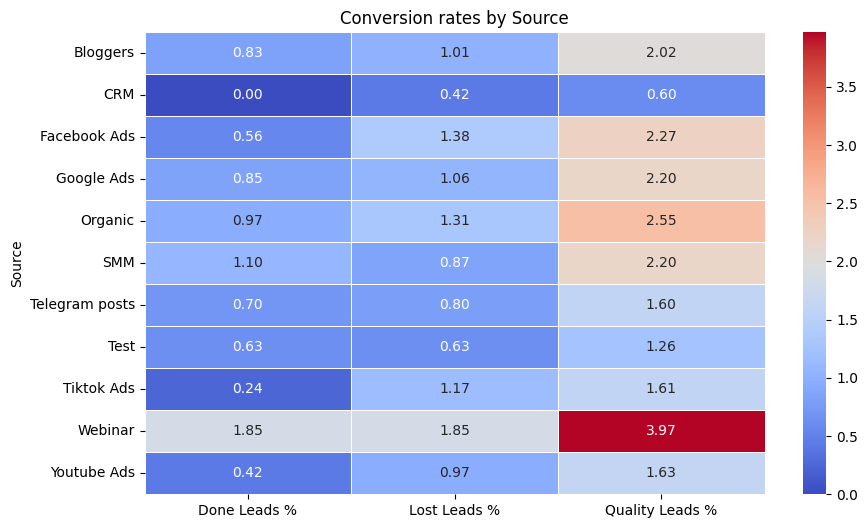

In [ ]:
# Create a summary table
pivot_table = high_quality_deals_analyse.pivot_table(index='Source',
                                                     values=['Quality Leads %',	'Done Leads %',	'Lost Leads %'],
                                                     aggfunc='mean')

# Creating a schedule
plt.figure(figsize=(10, 6))

# Heat map for conversion rates
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, linewidths=0.5)

plt.title('Conversion rates by Source')

plt.show()

Warm colors (red) mean higher conversion values, while cold colors (blue) mean lower values.
For example, Webinar has the highest percentage of quality leads (3.97%), while CRM shows zero percent of completed transactions.

Deal success funnel for quality customers Total Deals - Stage Done

In [ ]:
funnel_data_quality = pd.melt(high_quality_deals_analyse,
                      id_vars='Source',
                      value_vars=['Total Deals', 'High Quality'],
                      var_name='Stage',
                      value_name='Count')

funnel_data_quality

,Source,Stage,Count
0,Bloggers,Total Deals,1089
1,CRM,Total Deals,1656
2,Facebook Ads,Total Deals,4850
3,Google Ads,Total Deals,4226
4,Organic,Total Deals,2589
5,SMM,Total Deals,1730
6,Telegram posts,Total Deals,1000
7,Test,Total Deals,159
8,Tiktok Ads,Total Deals,2051
9,Webinar,Total Deals,378


In [ ]:
fig = px.funnel(funnel_data_quality,
                x='Count',
                y='Stage',
                color='Source',
                title="Funnel Visualization by Source and High Quality",
                hover_data=['Source', 'Count'])

fig.show()

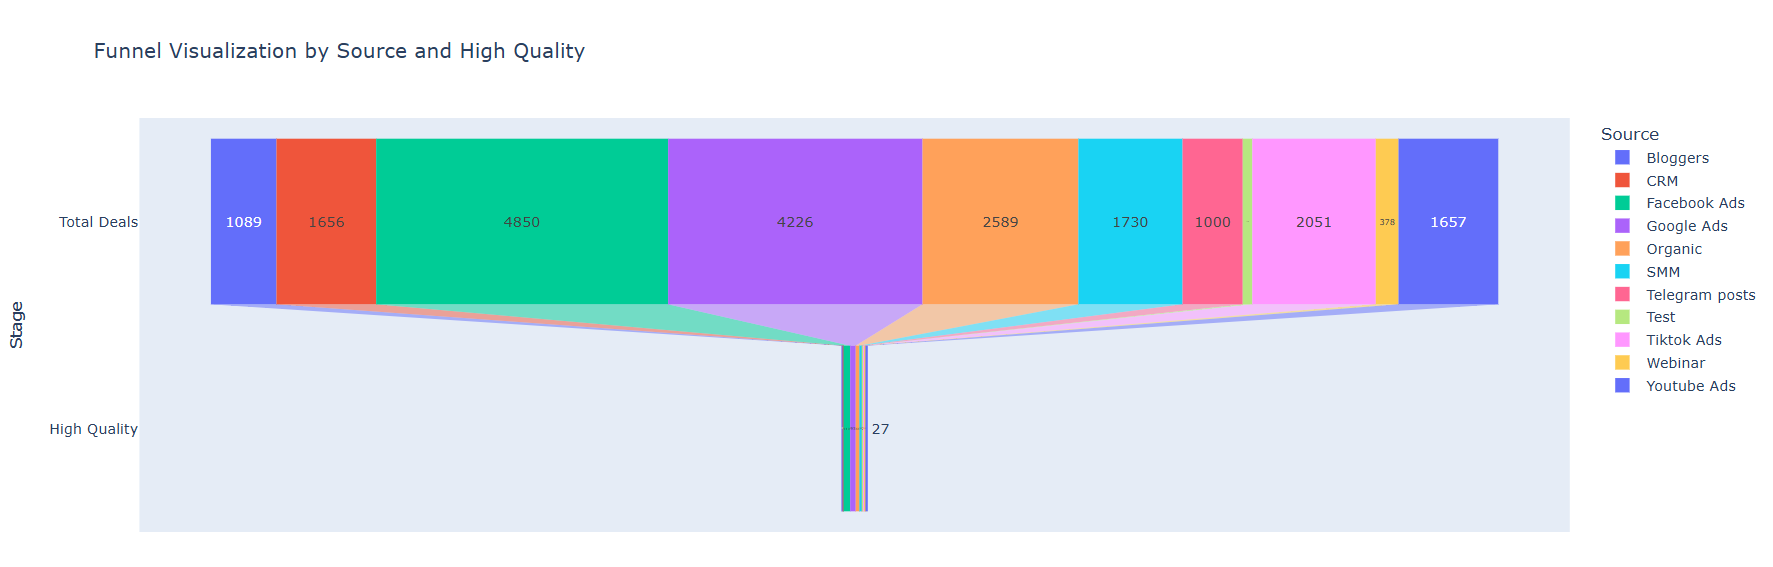

The funnel shows which sources generate the most deals and what percentage of them are High Quality category.
For example, Facebook Ads has a significant number of “Total Deals” (4,850), but only 110 of them are “High Quality”, which may indicate low quality leads.

Let's see the distribution of Sources by Transaction Stages. To do this, let's make a cross-table by Sources and Transaction Stages, based on which we will build a visualization

In [ ]:
stage_source = pd.crosstab(deals['Stage'], deals['Source'])
stage_source

Source,Bloggers,CRM,Facebook Ads,Google Ads,Offline,Organic,Partnership,SMM,Telegram posts,Test,Tiktok Ads,Webinar,Youtube Ads
Stage,,,,,,,,,,,,,
Call Delayed,124,80,612,290,1,179,13,258,156,73,202,41,219
Free Education,0,0,0,0,0,0,0,0,0,0,0,1,0
Lost,804,567,3545,3640,0,2037,20,1143,773,81,1502,290,1339
Need To Call,1,0,7,6,0,2,0,7,1,0,3,1,3
Need a consultation,1,0,6,4,0,2,0,1,2,0,1,3,3
Need to Call - Sales,0,3,9,6,0,2,0,4,1,1,2,0,5
New Lead,0,0,1,0,0,2,0,0,0,0,0,2,0
Payment Done,39,24,202,173,0,147,4,91,40,3,56,26,53
Qualificated,7,6,33,28,0,10,0,15,3,0,15,3,8


In [ ]:
# Calculate % for rows
stage_source_percentage = stage_source.apply(lambda x: x / x.sum() * 100, axis=1)

# Data translation for Plotly (unstacked)
stage_source_percentage_reset = stage_source_percentage.reset_index()
stage_source_percentage_melted = stage_source_percentage_reset.melt(id_vars='Stage',
                                                                    var_name='Source',
                                                                    value_name='Percentage')

fig = px.bar(stage_source_percentage_melted,
             x='Stage',
             y='Percentage',
             color='Source',
             title='Stage Distribution by Source',
             labels={'Stage': 'Stage', 'Percentage': 'Percentage'},
             barmode='stack',
             color_discrete_sequence=px.colors.qualitative.Plotly + px.colors.qualitative.Safe,
             width=1000,
             height=800)

# Setting the position of the legend
fig.update_layout(
    legend=dict(
        title='Source',
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02
    ),
    xaxis_tickangle=-90
)

fig.show()


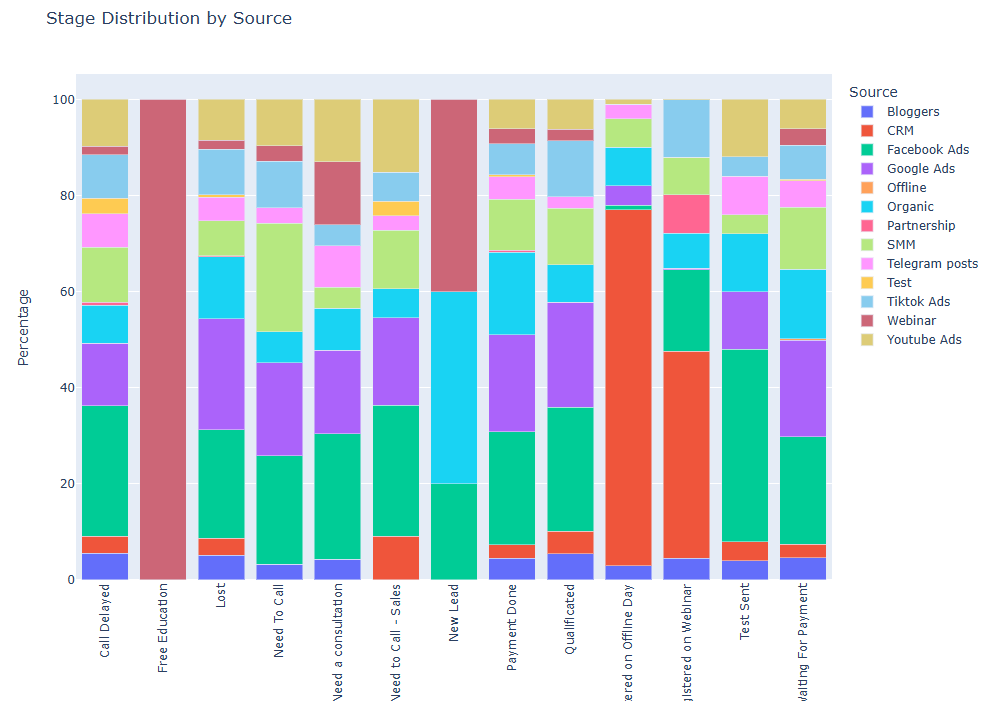

**Advertising channels with the highest number of lost transactions:**

Google Ads (3,640)** and **Facebook Ads (3,545) account for the most lost deals.** These channels attracted a large number of potential customers, but a large proportion of them did not complete the deal.
Organic (2037) and Tiktok Ads (1502) also attracted a lot of customers but with a lot of losses.

**Successful Transactions (Payment Done):**

The most successful channels for completed transactions are: **Facebook Ads (202 completed transactions) and Google Ads (173).**
Organic (147) and Youtube Ads (53) also brought certain results.

**Registrations for the webinar:**

The majority of webinar registrations came **from CRM (892), Bloggers (94), and Facebook Ads (351).** This may indicate that these channels are effective in attracting audiences to webinars.

**Call Delayed:**

The channels **Facebook Ads (612), Google Ads (290) and Tiktok Ads (202) **have a lot of delayed calls, which may indicate delays in processing leads, or difficulty in communicating through these channels.
Need for counseling:

**Channels where leads most often required counseling were Facebook Ads (6), Google Ads (4), and Telegram posts (2).** While this number is small, it may indicate a need to improve customer interactions in these channels.

**New leads:**

There are very few new leads, especially from **Google Ads and Facebook Ads**. This could be a sign that these channels are being used for repeat interactions rather than attracting new customers.
Waiting for Payment (Waiting for Payment):

Facebook Ads (73) and Google Ads (65) again lead the way in terms of deals pending payment, indicating a high number of potential deal completions.

**Offline and Partnerships:**

Very low activity across all stages, which may suggest that these channels are ineffective or less emphasis is being placed on them.

Key finding:
Google Ads, Facebook Ads, and Organic are the main sources of leads, but they also lead to the highest number of lost transactions. It may be worth looking at the efficiency of handling leads from these channels to improve conversion rates. CRMs and Bloggers are good at attracting people to webinars, which can be used for training or product credibility.

It is interesting to analyze the distribution of deals by source, quality and product.
For a more relevant analysis, let's exclude the values Unknown


In [ ]:
filtered_deals = deals[(deals['Source'] != 'Unknown') &
                       (deals['Quality'] != 'Unknown') &
                       (deals['Product'] != 'Unknown')]

multi_category_analysis = filtered_deals.groupby(['Source', 'Quality', 'Product']).size().reset_index(name='Count')

fig = px.sunburst(multi_category_analysis,
                  path=['Source', 'Quality', 'Product'],
                  values='Count',
                  title="Distribution of Deals by Source, Quality and Product (excluding 'Unknown')")

fig.show()

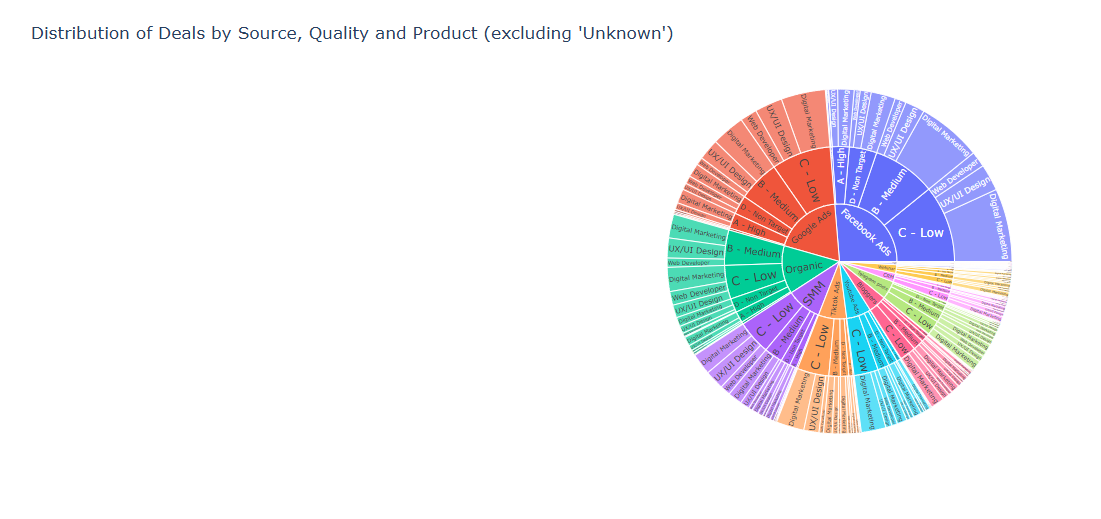

**The main sources are Facebook Ads, Google Ads, Organic and SMM.**

**Facebook Ads and Google Ads mostly drive low quality leads** (C - Low), but** Google Ads **also has a significant number of medium to high quality leads.
**Organic and SMM also lean towards low quality leads (C - Low), **which indicates low quality leads coming organically or through social media.
The most popular products, regardless of source, **are UX/UI Design, Digital Marketing and Web Development.**but the most common combinations of low quality leads (C - Low) are.

**Google Ads **are the most diverse, including low, medium and high quality leads, indicating that this source can bring both higher quality and lower quality deals.
**Facebook Ads** is more monotonous mostly low quality leads.

Overall conclusion:
Google Ads performs better in terms of quality leads, offering a more diverse set of leads in terms of quality (low to high).
Facebook Ads and SMM are more focused on attracting low-quality customers.
Products such as UX/UI Design and Digital Marketing are popular among all sources, but are often associated with low-quality leads.